In [1]:
import numpy as np
import pandas as pd
from models.jump_cir import JumpCIR
from models.cir import CIR
from evaluators.monte_carlo import MonteCarlo

In [2]:
model_params = {
    "kappa_r": 0.5,
    "mu_r": 0.06,
    "sigma": 0.02,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [3]:
cir = CIR(model_params)
jump_cir = JumpCIR(model_params)

In [4]:
mc_cir = MonteCarlo(cir)

In [5]:
mc_cir._simulate_paths(m=365, r0=0.04, n=1000, T=3)

(0.8613539900303946, 0.006757237327998599)

In [6]:
mc_cir._simulate_paths_anti(m=365, r0=0.04, n=1000, T=3)

(0.8615260567154512, 0.0002010780081457311)

In [7]:
cir.exact(r0=0.04, T=3)

0.8616606594855633

In [8]:
mc_jump_cir = MonteCarlo(jump_cir)

In [9]:
mc_jump_cir._simulate_paths(m=365, r0=0.04, n=1000, T=3)

(0.8610499557397755, 0.006915895819332402)

In [10]:
mc_jump_cir._simulate_paths_anti(m=365, r0=0.04, n=1000, T=3)

(0.8615349891974003, 0.0005055838611447846)

In [12]:
mc_jump_cir._simulate_paths_cv(m=365, r0=0.04, n=1000, T=3, exact_model_class=CIR)

(0.8615882302587952, 0.010012692822098886)

In [13]:
T = np.arange(1, 21)
prices_class = np.empty(len(T))
std_class = np.empty(len(T))
prices_anti = np.empty(len(T))
std_anti = np.empty(len(T))

In [14]:
for t in T:
    prices_class[t-1], std_class[t-1] = mc_jump_cir._simulate_paths(m=36, r0=0.04, n=250, T=t)
    prices_anti[t-1], std_anti[t-1] = mc_jump_cir._simulate_paths_anti(m=36, r0=0.04, n=250, T=t)

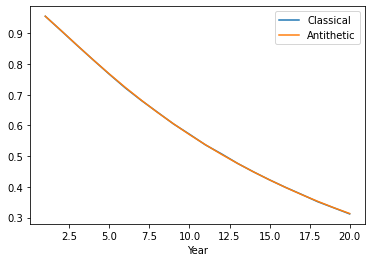

In [17]:
price_df = pd.concat([pd.Series(prices_class), pd.Series(prices_anti)], axis=1)
price_df.index = pd.Index(T, name="Year")
price_df.columns = ["Classical", "Antithetic"]
price_df.plot()

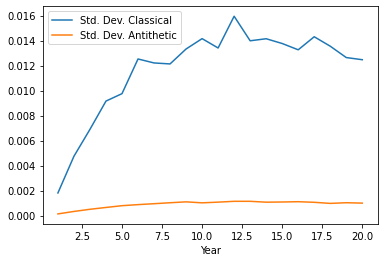

In [18]:
std_df = pd.concat([pd.Series(std_class), pd.Series(std_anti)], axis=1)
std_df.index = pd.Index(T, name="Year")
std_df.columns = ["Std. Dev. Classical", "Std. Dev. Antithetic"]
std_df.plot()